In [164]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [165]:
#make a request to the url and check the response
url = "https://ai-jobs.net/api/list-jobs/"
response = requests.get(url)
response

<Response [200]>

In [166]:
#convert the response to json format 
jobs_json = response.json()
jobs_json.keys()

dict_keys(['count', 'results'])

## Explore the dataset

In [167]:
jobs_json['count']

200

In [168]:
jobs_json['results'][6]

{'id': 23057,
 'ext': False,
 'url': 'https://ai-jobs.net/job/23057-data-analyst-enterprise-analytics/',
 'publish': '2022-06-20T01:39:10.711Z',
 'title': 'Data Analyst, Enterprise Analytics',
 'description': '<p></p><p>Take-Two Interactive, Inc., a leader in the interactive entertainment industry, is looking for a dynamic analyst to support the design and build out of a enterprise-wide, advanced center of analytics, a critical component of the overall corporate analytics strategy. She/he will support the label and corporate teams throughout the global organization. This hands-on role is located in New York City and requires strong analytical acumen and exceptional communication skills.</p><p></p><p>Specific Responsibilities:</p><p></p><ul><li>Support the design and build of Take-Two’s advanced analytics center of excellence</li><li>Develop business insights to generate enterprise value creation</li><li>Support the development, monitoring and measurement of results of key performance i

In [169]:
type(jobs_json['results'])

list

## Data Cleaning

In [170]:
tag = []
for elem in jobs_json['results']:
     for key, value in elem.items():
            if key == 'tags':
                tag.extend(value.split(','))

tag = [element.strip() for element in tag]
tag = [element.replace('ML', 'Machine Learning') for element in tag]
print(tag)

['A/B testing', 'Airflow', 'Big Data', 'Data visualization', 'Engineering', 'Hadoop', 'KPIs', 'Machine Learning', 'Predictive modeling', 'Python', 'PyTorch', 'R', 'Research', 'SAS', 'Scikit-Learn', 'Spark', 'SQL', 'Statistical modeling', 'Tableau', 'TensorFlow', 'Testing', 'Excel', 'Research', 'Airflow', 'Azkaban', 'Banking', 'Business Intelligence', 'Data visualization', 'Engineering', 'ETL', 'Periscope', 'Python', 'Scala', 'Spark', 'SQL', 'Tableau', 'Business Intelligence', 'Engineering', 'Google Cloud', 'Agile', 'Azure', 'Data Analytics', 'Data pipelines', 'Data strategy', 'Data visualization', 'Data Warehousing', 'Engineering', 'ETL', 'FiveTran', 'Git', 'Machine Learning', 'Power BI', 'Python', 'Snowflake', 'SQL', 'Streaming', 'Excel', 'Finance', 'SQL', 'Business Analytics', 'Business Intelligence', 'Data Analytics', 'Economics', 'Excel', 'Finance', 'Oracle', 'Python', 'R', 'SQL', 'Tableau', 'Airflow', 'BigQuery', 'Data pipelines', 'Engineering', 'ETL', 'Git', 'Looker', 'LookMachin

In [171]:
clean_tag = list(set(tag))

In [172]:
len(clean_tag)

164

In [173]:
set(clean_tag)

{'3D Reconstruction',
 'A/B experiments',
 'A/B testing',
 'A/B tests',
 'AI strategy',
 'API Development',
 'AWS',
 'Agile',
 'Airflow',
 'Ansible',
 'Apache Flink',
 'Arrow',
 'Athena',
 'Autonomous Driving',
 'Avro',
 'Azkaban',
 'Azure',
 'Banking',
 'Big Data',
 'BigQuery',
 'Blockchain',
 'Business Analytics',
 'Business Intelligence',
 'CAD',
 'CUDA',
 'CX',
 'Caffe',
 'Cassandra',
 'Classification',
 'Computer Vision',
 'Consulting',
 'Consulting firm',
 'Credit risk',
 'Crypto',
 'Data Analytics',
 'Data Mining',
 'Data Studio',
 'Data Warehousing',
 'Data pipelines',
 'Data strategy',
 'Data visualization',
 'DataRobot',
 'Databricks',
 'Dataflow',
 'Deep Learning',
 'Distributed Systems',
 'DynamoDB',
 'EC2',
 'ECS',
 'ELK',
 'ETL',
 'ETL pipelines',
 'Economics',
 'Elasticsearch',
 'Engineering',
 'Excel',
 'Feature engineering',
 'FinTech',
 'Finance',
 'Firehose',
 'FiveTran',
 'GCP',
 'GPU',
 'Git',
 'GitLab',
 'Google Cloud',
 'GraphQL',
 'HDFS',
 'Hadoop',
 'HuggingFac

## Insert the data into a dictionary then convert it to a dataframe

In [174]:
data = {}
count = 0
ls = []
#loop through the jobs and access the tags key
for elem in jobs_json['results']:
    #separate the tags on the comma separator
    ls = elem['tags'].split(',')
    #remove whitespace
    ls = [element.strip() for element in ls]
    #add the list into a dictionary with numbers from 0 as keys
    data[count] = ls
    count += 1

In [175]:
data

{0: ['A/B testing',
  'Airflow',
  'Big Data',
  'Data visualization',
  'Engineering',
  'Hadoop',
  'KPIs',
  'Machine Learning',
  'Predictive modeling',
  'Python',
  'PyTorch',
  'R',
  'Research',
  'SAS',
  'Scikit-Learn',
  'Spark',
  'SQL',
  'Statistical modeling',
  'Tableau',
  'TensorFlow',
  'Testing'],
 1: ['Excel', 'Research'],
 2: ['Airflow',
  'Azkaban',
  'Banking',
  'Business Intelligence',
  'Data visualization',
  'Engineering',
  'ETL',
  'Periscope',
  'Python',
  'Scala',
  'Spark',
  'SQL',
  'Tableau'],
 3: ['Business Intelligence', 'Engineering', 'Google Cloud'],
 4: ['Agile',
  'Azure',
  'Data Analytics',
  'Data pipelines',
  'Data strategy',
  'Data visualization',
  'Data Warehousing',
  'Engineering',
  'ETL',
  'FiveTran',
  'Git',
  'Machine Learning',
  'Power BI',
  'Python',
  'Snowflake',
  'SQL',
  'Streaming'],
 5: ['Excel', 'Finance', 'SQL'],
 6: ['Business Analytics',
  'Business Intelligence',
  'Data Analytics',
  'Economics',
  'Excel',
 

In [176]:
#pd.DataFrame(dict([ (k, pd.Series(v)) for k,v in data.items() ]))

In [177]:
#create a dataframe
tags_df = pd.DataFrame.from_dict(data, orient = 'index')
tags_df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,A/B testing,Airflow,Big Data,Data visualization,Engineering,Hadoop,KPIs,Machine Learning,Predictive modeling,Python,...,None,None,None,None,None,None,None,None,None,None
1,Excel,Research,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Airflow,Azkaban,Banking,Business Intelligence,Data visualization,Engineering,ETL,Periscope,Python,Scala,...,None,None,None,None,None,None,None,None,None,None
3,Business Intelligence,Engineering,Google Cloud,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Agile,Azure,Data Analytics,Data pipelines,Data strategy,Data visualization,Data Warehousing,Engineering,ETL,FiveTran,...,None,None,None,None,None,None,None,None,None,None


In [178]:
tags_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
195,Big Data,Excel,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
196,A/B testing,AWS,Classification,Consulting,Data Mining,Deep Learning,Economics,Engineering,Machine Learning,ML,...,None,None,None,None,None,None,None,None,None,None
197,AWS,Azure,Consulting,Consulting firm,Data strategy,Engineering,Security,None,None,None,...,None,None,None,None,None,None,None,None,None,None
198,Big Data,Data pipelines,Engineering,ETL,KPIs,Looker,Python,R,SQL,Tableau,...,None,None,None,None,None,None,None,None,None,None
199,Credit risk,Economics,Engineering,ETL,Machine Learning,PhD,Python,R,Research,Spark,...,None,None,None,None,None,None,None,None,None,None


In [179]:
tags_df.isna().sum()

0       0
1       0
2       4
3      15
4      24
5      30
6      47
7      59
8      69
9      85
10     95
11    118
12    135
13    151
14    157
15    160
16    168
17    171
18    177
19    183
20    188
21    192
22    193
23    194
24    194
25    195
26    197
27    199
28    199
29    199
30    199
31    199
32    199
33    199
34    199
35    199
dtype: int64

In [180]:
tags_df.shape

(200, 36)

In [181]:
tags_df[tags_df.iloc[:, 35].notna()]

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
186,Agile,AI strategy,AWS,Azure,BigQuery,Consulting,Consulting firm,Databricks,Data pipelines,Engineering,...,Redshift,SageMaker,Scikit-Learn,Security,Snowflake,Spark,SQL,Streaming,Tableau,Testing


In [182]:
tags_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,A/B testing,Airflow,Big Data,Data visualization,Engineering,Hadoop,KPIs,Machine Learning,Predictive modeling,Python,...,None,None,None,None,None,None,None,None,None,None
1,Excel,Research,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Airflow,Azkaban,Banking,Business Intelligence,Data visualization,Engineering,ETL,Periscope,Python,Scala,...,None,None,None,None,None,None,None,None,None,None
3,Business Intelligence,Engineering,Google Cloud,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Agile,Azure,Data Analytics,Data pipelines,Data strategy,Data visualization,Data Warehousing,Engineering,ETL,FiveTran,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Big Data,Excel,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
196,A/B testing,AWS,Classification,Consulting,Data Mining,Deep Learning,Economics,Engineering,Machine Learning,ML,...,None,None,None,None,None,None,None,None,None,None
197,AWS,Azure,Consulting,Consulting firm,Data strategy,Engineering,Security,None,None,None,...,None,None,None,None,None,None,None,None,None,None
198,Big Data,Data pipelines,Engineering,ETL,KPIs,Looker,Python,R,SQL,Tableau,...,None,None,None,None,None,None,None,None,None,None


In [183]:
#transpose the dataframe
df = tags_df.T
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,A/B testing,Excel,Airflow,Business Intelligence,Agile,Excel,Business Analytics,Airflow,Classification,Engineering,...,Engineering,Airflow,Agile,Agile,Engineering,Big Data,A/B testing,AWS,Big Data,Credit risk
1,Airflow,Research,Azkaban,Engineering,Azure,Finance,Business Intelligence,BigQuery,Computer Vision,Industrial,...,MLOps,AWS,BigQuery,Git,Machine Learning,Excel,AWS,Azure,Data pipelines,Economics
2,Big Data,None,Banking,Google Cloud,Data Analytics,SQL,Data Analytics,Data pipelines,Deep Learning,Machine Learning,...,MVPs,Big Data,Business Intelligence,Linux,ML,None,Classification,Consulting,Engineering,Engineering
3,Data visualization,None,Business Intelligence,None,Data pipelines,None,Economics,Engineering,Machine Learning,PhD,...,Testing,Business Intelligence,Classification,Machine Learning,MLFlow,None,Consulting,Consulting firm,ETL,ETL
4,Engineering,None,Data visualization,None,Data strategy,None,Excel,ETL,ML,Python,...,None,Data strategy,Data Analytics,Matlab,ML models,None,Data Mining,Data strategy,KPIs,Machine Learning
5,Hadoop,None,Engineering,None,Data visualization,None,Finance,Git,MLOps,Research,...,None,Data Warehousing,Data pipelines,PhD,MLOps,None,Deep Learning,Engineering,Looker,PhD
6,KPIs,None,ETL,None,Data Warehousing,None,Oracle,Looker,Open Source,None,...,None,ETL,Economics,Scrum,Python,None,Economics,Security,Python,Python
7,Machine Learning,None,Periscope,None,Engineering,None,Python,LookML,Python,None,...,None,Finance,Engineering,Testing,Testing,None,Engineering,None,R,R
8,Predictive modeling,None,Python,None,ETL,None,R,Postgres,SQL,None,...,None,Informatica,Finance,None,None,None,Machine Learning,None,SQL,Research
9,Python,None,Scala,None,FiveTran,None,SQL,Python,None,None,...,None,Kafka,Git,None,None,None,ML,None,Tableau,Spark


In [184]:
#add one to each occurrence of a skill for each job posting
aggre = df.apply(pd.value_counts)
aggre

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
3D Reconstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A/B experiments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A/B testing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
A/B tests,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AI strategy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unstructured data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XGBoost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XML,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
#sum the total number of occurrences of a skill in all the job postings
#sort the dataframe on the sum column in descending order
aggre['sum'] = aggre.sum(axis = 1)
aggre.sort_values('sum', ascending = False, inplace = True)
aggre.reset_index(inplace = True)
aggre

,index,0,1,2,3,4,5,6,7,8,...,191,192,193,194,195,196,197,198,199,sum
0,Python,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,142.0
1,Engineering,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,...,NaN,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,130.0
2,SQL,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,1.0,124.0
3,Machine Learning,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,95.0
4,Testing,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,HuggingFace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
161,JSON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
162,KNIME,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
163,SSIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


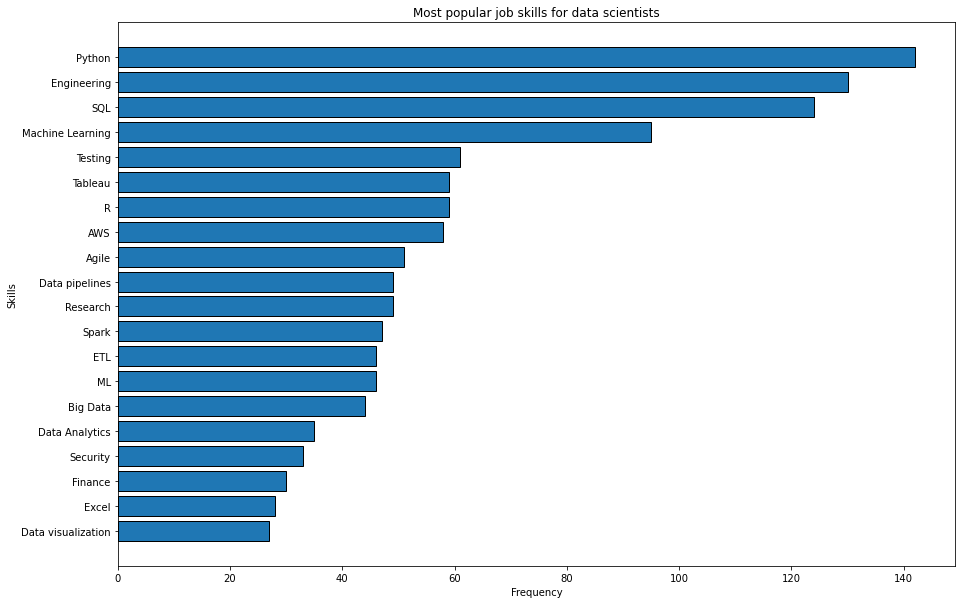

In [186]:
#plot the most popular skills needed for the data scientist job
fig, ax = plt.subplots(figsize = (15,10))
ax.barh(y = aggre['index'][:20][::-1], width = aggre['sum'][:20][::-1], height = 0.8, edgecolor = 'black')
ax.set_title('Most popular job skills for data scientists')
ax.set_ylabel('Skills')
#plt.xticks(rotation = 75)
ax.set_xlabel('Frequency');

### Conclusion

The visualization above shows that the most popular data science skills companies are currently look for are:
* Python
* Data Engineering
* SQL
* Machine Learning
* Testing